# PISA dataset exploration
## by Saud Qadir Khan

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#uni_exp)
- [Bivariate Exploration](#bi_exp)
- [Multivariate Exploration](#multi_exp)


<a id='intro'></a>
## Introduction
>This notebook will be dedicated to exploring details of the PISA 2012 dataset. PISA, in particular, is a "survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school" (Udacity, 2020)

The original dataset contains 485490 rows and 636 columns. For our analysis the dataset was reduced to columns of interest. The data wrangling process is described as follow

<a id='wrangling'></a>
## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from urllib.request import urlopen
from zipfile import ZipFile

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [ ]:
zipurl = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip'
# Download the file from the URL
zipresp = urlopen(zipurl)
# Create a new file on the hard drive
tempzip = open("/content/drive/My Drive/Data_Analysis/5_data_visualization/Project/Project/tempfile.zip", "wb")
# Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read())
# Close the newly-created file
tempzip.close()

In [3]:
# Re-open the newly-created file with ZipFile()
zf = ZipFile("/content/drive/My Drive/Data_Analysis/5_data_visualization/Project/Project/tempfile.zip")
# Extract its contents into <extraction_path>
# note that extractall will automatically create the path
zf.extractall(path = '/')
# close the ZipFile instance
zf.close()

In [8]:
df =pd.read_csv('/pisa2012.csv',encoding = "ISO-8859-1",index_col=0)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CNT  SUBNATIO  STRATUM      OECD  ... WVARSTRR  VAR_UNIT  SENWGT_STU  VER_STU
1  Albania     80000  ALB0006  Non-OECD  ...       19         1      0.2098  22NOV13
2  Albania     80000  ALB0006  Non-OECD  ...       19         1      0.2098  22NOV13
3  Albania     80000  ALB0006  Non-OECD  ...       19         1      0.1999  22NOV13
4  Albania     80000  ALB0006  Non-OECD  ...       19         1      0.1999  22NOV13
5  Albania     80000  ALB0006  Non-OECD  ...       19         1      0.1999  22NOV13

[5 rows x 635 columns]

In [4]:
data_dict =pd.read_csv("/content/drive/My Drive/Data_Analysis/5_data_visualization/Project/pisadict2012.csv",encoding = "ISO-8859-1")
data_dict.head(15)

Unnamed: 0                                                  x
0         CNT                           Country code 3-character
1    SUBNATIO  Adjudicated sub-region code 7-digit code (3-di...
2     STRATUM  Stratum ID 7-character (cnt + region ID + orig...
3        OECD                                       OECD country
4          NC                       National Centre 6-digit Code
5    SCHOOLID  School ID 7-digit (region ID + stratum ID + 3-...
6     STIDSTD                                         Student ID
7     ST01Q01                                International Grade
8     ST02Q01                           National Study Programme
9     ST03Q01                                      Birth - Month
10    ST03Q02                                        Birth -Year
11    ST04Q01                                             Gender
12    ST05Q01                                   Attend <ISCED 0>
13    ST06Q01                                   Age at <ISCED 1>
14    ST07Q01                                 Repeat - <ISCED 1>

In [9]:
df.shape

(485490, 635)

In [10]:
data =df.copy()

In [11]:
data = data[['CNT', 'STIDSTD', 'ST04Q01', 'ST13Q01', 'ST14Q01',
         'ST17Q01', 'ST18Q01', 'ST57Q01', 'ST72Q01','PV1MATH',
         'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ',
         'PV2READ',  'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE',
         'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', ]]

In [12]:
# Create average of Math scores
data['Average Math Score']    = (data['PV1MATH'] + data['PV2MATH'] + data['PV3MATH'] + data['PV4MATH'] + data['PV5MATH']) / 5

# Create average of Reading scores
data['Average Reading Score'] = (data['PV1READ'] + data['PV2READ'] + data['PV3READ'] + data['PV4READ'] + data['PV5READ']) / 5

# Create average of Science scores
data['Average Science Score'] = (data['PV1SCIE'] + data['PV2SCIE'] + data['PV3SCIE'] + data['PV4SCIE'] + data['PV5SCIE']) / 5

# Create average score
data['Average Total Score']   = (data['Average Math Score'] + data['Average Reading Score'] + data['Average Science Score']) / 3

In [13]:
data.drop(columns=['PV1MATH',  'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',   
                         'PV1READ', 'PV2READ',  'PV3READ', 'PV4READ',  'PV5READ',
                         'PV1SCIE',  'PV2SCIE', 'PV3SCIE',  'PV4SCIE', 'PV5SCIE'], inplace=True)

In [14]:
data.rename({'CNT': 'Country',
                   'STIDSTD': 'Student ID',
                   'ST04Q01': 'Gender', 
                   'ST13Q01': 'Mother highest schooling', 
                   'ST17Q01': 'Father highest schooling',
                   'ST57Q01': 'Homework time (h/wk)',
                   'ST14Q01': 'Mother holding a Bachelor',
                   'ST18Q01': 'Father holding a Bachelor',
                   'ST72Q01': 'Class_size'
                  }, axis='columns', inplace=True)

In [15]:
data.sample(10)

Country  ...  Average Total Score
259415                 Italy  ...           429.302467
358533              Malaysia  ...           464.424780
274718                Jordan  ...           365.625807
10566   United Arab Emirates  ...           487.700520
384396              Portugal  ...           382.588827
88038                 Canada  ...           686.419393
219938               Hungary  ...           430.942540
63376                 Brazil  ...           512.024447
392216                 Qatar  ...           320.435413
400572        China-Shanghai  ...           676.417900

[10 rows x 13 columns]

In [16]:
data.shape

(485490, 13)

### What is the structure of your dataset?

> Originally, there were 267 features and a sample of 485490 students. I only selected few of them for analysis THe final clean data only contain 13 features for analysis

### What is/are the main feature(s) of interest in your dataset?

> The main features of intrest are average scores of different subjects

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Gender, Origin Country, class size homework time and education of parents would help me to investigate the score of student

<a id='uni_exp'></a>
## Univariate Exploration

In [17]:
#names of my variables of interest
#CATEGORICAL
gender= 'Gender'
homework = 'Homework time (h/wk)'
country = 'Country'
motherbachelor = 'Mother holding a Bachelor'
fatherbachelor = 'Father holding a Bachelor'
mother_hs = 'Mother highest schooling'
father_hs = 'Father highest schooling'

#NUMERICAL
math = 'Average Math Score'
science = 'Average Science Score'
reading = 'Average Reading Score'
total = 'Average Total Score'
class_size = 'Class_size'

### Main variables
 > I'll start by looking the different scores distributions

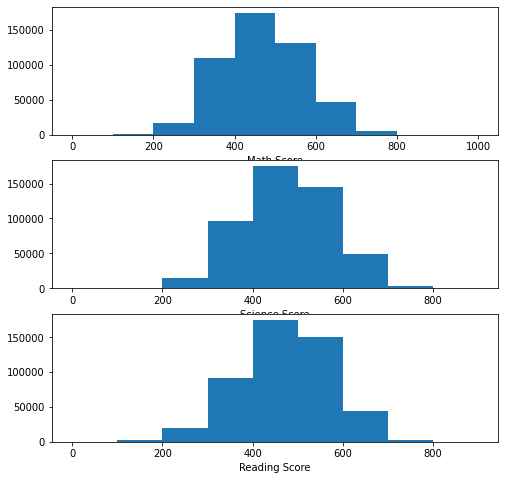

In [18]:
#histograms of different scores
plt.figure(figsize = [8,8])
binsize = 100

#subplot 1: Math score hist
ax = plt.subplot(3,1,1)
bins = np.arange(0, data[math].max()+binsize, binsize)
plt.hist(data = data, x = math, bins = bins)
plt.xlabel('Math Score')

#subplot 2: Science score hist
ax = plt.subplot(3,1,2)
bins = np.arange(0, data[science].max()+binsize, binsize)
plt.hist(data = data, x = science, bins = bins)
plt.xlabel('Science Score')

#subplot 3: Reading score hist
ax = plt.subplot(3,1,3)
bins = np.arange(0, data[reading].max()+binsize, binsize)
plt.hist(data = data, x = reading, bins = bins)
plt.xlabel('Reading Score')


plt.show()

> All three show a normal distribution so no need to make any transformation. 
The graph shows how students get more similar results in Science and Reading, whereas there is more diversion in the Maths Score plot. Students tend to get lower grades in Maths. You can see a peak around the 350 - 550 interval. The peak around the 500 - 600 interval in Maths is lower than the others.

### Parents education
Now let's take a look at the parents level of education. We'll start by looking both at their highest schooling and if they have or not a bachelor.

In [19]:
#value counts of parents highest schooling
print(data[mother_hs].value_counts())
print('Sum is',data[mother_hs].value_counts().sum())
print('-'*20)
print(data[father_hs].value_counts())
print('Sum is',data[father_hs].value_counts().sum())

<ISCED level 3A>                         236993
<ISCED level 3B, 3C>                      83048
<ISCED level 2>                           82614
<ISCED level 1>                           36556
She did not complete <ISCED level 1>      18768
Name: Mother highest schooling, dtype: int64
Sum is 457979
--------------------
<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: Father highest schooling, dtype: int64
Sum is 443261


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

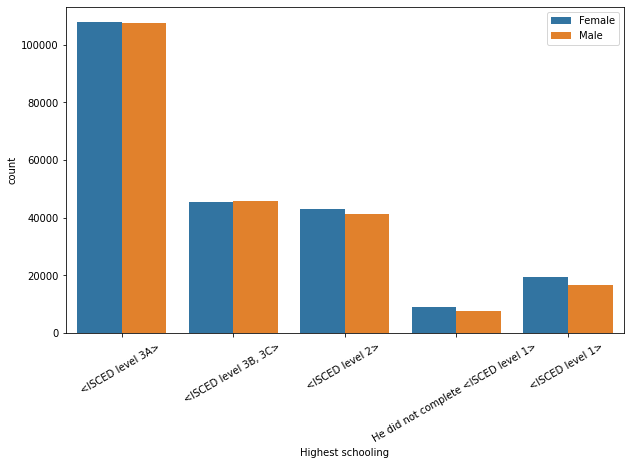

In [20]:
plt.figure(figsize=[10,6])
sb.countplot(data = data, x = father_hs, hue = gender);
plt.xlabel('Highest schooling');
plt.legend();
plt.xticks(rotation = 30)

We can see that almost 50% did not finish school. Let's check how many of the total do hold a Bachelor. For our analysis, we'll use this variable as the main one to compare parents education: whether they have a Bachelor or  not.

In [21]:
#value_counts of parents with bachelor
print(data[motherbachelor].value_counts())
print('Sum is',data[motherbachelor].value_counts().sum())
print('-'*20)
print(data[fatherbachelor].value_counts())
print('Sum is',data[fatherbachelor].value_counts().sum())

No     365418
Yes     25063
Name: Mother holding a Bachelor, dtype: int64
Sum is 390481
--------------------
No     341826
Yes     29589
Name: Father holding a Bachelor, dtype: int64
Sum is 371415


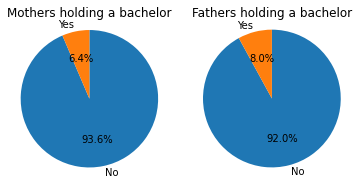

In [22]:
#pie chart of parents holding a bachelor
plt.subplot(1,2,1)
sorted_counts = data[motherbachelor].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, counterclock = False, autopct='%1.1f%%');
plt.axis('square');
plt.title('Mothers holding a bachelor');

plt.subplot(1,2,2)
sorted_counts1 = data[fatherbachelor].value_counts();
plt.pie(sorted_counts1, labels = sorted_counts1.index, startangle=90, counterclock = False, autopct='%1.1f%%');
plt.axis('square');
plt.title('Fathers holding a bachelor');

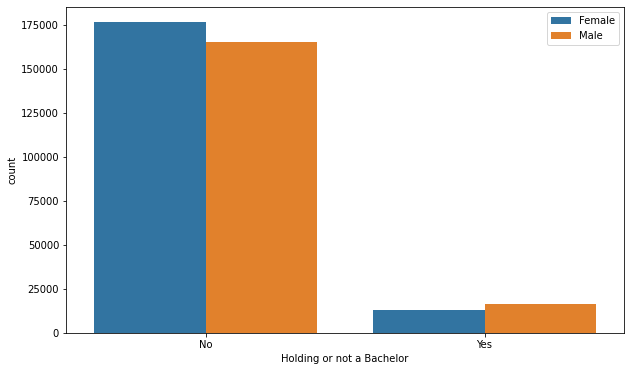

In [23]:
plt.figure(figsize=[10,6])
sb.countplot(data = data, x = fatherbachelor, hue = gender);
plt.xlabel('Holding or not a Bachelor');
plt.legend();

Interestingly, although more women than men finish school, from the ones who finish school, more men end up having a bachelor. In numbers, around 6% of mothers hold one and almost 8% of men hold one.

Let's check the gender distribution

### Gender

In [24]:
#confirming gender distribution
print(data[gender].value_counts())
print(data[gender].value_counts().sum())

Female    245064
Male      240426
Name: Gender, dtype: int64
485490


Text(0.5, 1.0, 'Gender Distribution')

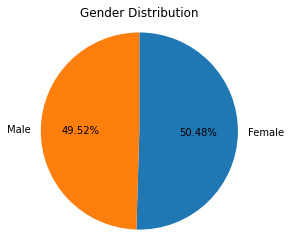

In [25]:
gender_vc = data[gender].value_counts()
plt.pie(gender_vc, labels = gender_vc.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square');
plt.title('Gender Distribution')


I just wanted to check if it was similar, and it is. It's almost 50% female/male.

### Homework

I'll now look into the time spent doing their homework. 

In [26]:
#checking how many null values
a = print(data[homework].isnull().sum())
b = print(data[homework].sum())

184123
1655641.0


Almost 10% null values

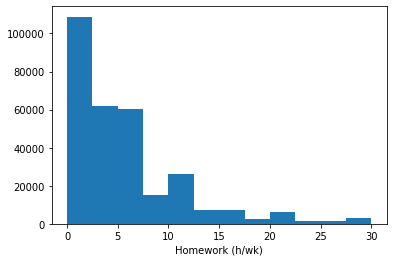

In [27]:
#Homework hist
binsize = 2.5
bins = np.arange(0, data[homework].max()+binsize, binsize)
plt.hist(data = data, x = homework, bins = bins)
plt.xlabel('Homework (h/wk)');

Most seem to study at home around nothing anf 2.5h/wk. It's skewed to the left with a long tail. Maybe we should make a log transform to see if we can get a normal distribution.

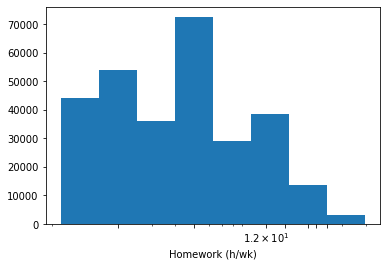

In [28]:
#histogram of homework
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(data[homework].max())+log_binsize, log_binsize)
plt.hist(data = data, x = homework, bins = bins)
plt.xscale('log')
plt.xticks([2,5,12,15,20,22,25])
plt.xlabel('Homework (h/wk)')
plt.show()

The log transformation doesn't seem to be much more helpful. It is now more similar to a normal distribution but not much more illustrative. You can still see a peak around 2,5 and 11.

### Class size

Let's now look into the class size

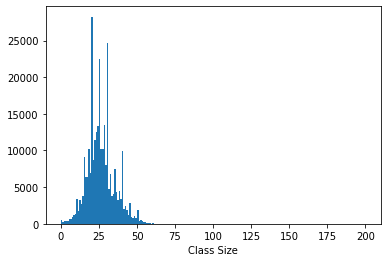

In [29]:
#class size hist
plt.figure(figsize = [6,4])
binsize = 1
bins = np.arange(0, data[class_size].max()+binsize, binsize);
plt.hist(data = data, x = class_size, bins = bins);
plt.xlabel('Class Size');

In [30]:
data[class_size].describe()

count    294163.000000
mean         26.017759
std           9.223134
min           0.000000
25%          20.000000
50%          25.000000
75%          30.000000
max         200.000000
Name: Class_size, dtype: float64

In [31]:
#0 pupils class size
print(data[data[class_size] == 0].count())
print('-'*20)
print(data[data[class_size] > 70].count())

Country                      546
Student ID                   546
Gender                       546
Mother highest schooling     519
Mother holding a Bachelor    429
Father highest schooling     504
Father holding a Bachelor    413
Homework time (h/wk)         525
Class_size                   546
Average Math Score           546
Average Reading Score        546
Average Science Score        546
Average Total Score          546
dtype: int64
--------------------
Country                      163
Student ID                   163
Gender                       163
Mother highest schooling     153
Mother holding a Bachelor    139
Father highest schooling     147
Father holding a Bachelor    136
Homework time (h/wk)         154
Class_size                   163
Average Math Score           163
Average Reading Score        163
Average Science Score        163
Average Total Score          163
dtype: int64


There seems to be 546 classes with 0 pupils, it's only a 0.18%. There might have been an error in data input. Also, the left limits in the histogram also suggest that there are some points that take unusually big values. There 163 classes that take more thn 70 students, up to 200.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All three score types show a normal distribution so no need to make any transformation. The graph shows how students get more similar results in Science and Reading, whereas there is more diversion in the Maths Score plot. Students tend to get lower grades in Maths. You can see a peak around the 350 - 550 interval.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The 'homework' plot is skewed to the left with a long tail. I made a log transform to see if we could get a normal distribution. The log transformation doesn't seemed to be much more helpful. It is now more similar to a normal distribution but not much more illustrative. You can still see a peak around 2,5 and 11.

## Bivariate Exploration
<a id='bi_exp'></a>
To start off with, I want to look at the pairwise correlations present between the main features in the data.

In [32]:
#names of my variables of interest
#CATEGORICAL
gender= 'Gender'
homework = 'Homework time (h/wk)'
country = 'Country'
motherbachelor = 'Mother holding a Bachelor'
fatherbachelor = 'Father holding a Bachelor'
mother_hs = 'Mother highest schooling'
father_hs = 'Father highest schooling'

#NUMERICAL
math = 'Average Math Score'
science = 'Average Science Score'
reading = 'Average Reading Score'
total = 'Average Total Score'
class_size = 'Class_size'

#clustering
scores = [math, science, reading, total]
num_vars = [math, science, reading, total, homework, class_size] 
cat_vars = [gender, country, motherbachelor, fatherbachelor, mother_hs, father_hs]

### Main values correlation

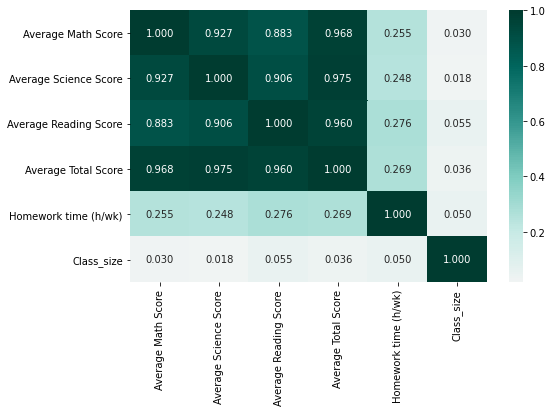

In [33]:
#Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(data[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

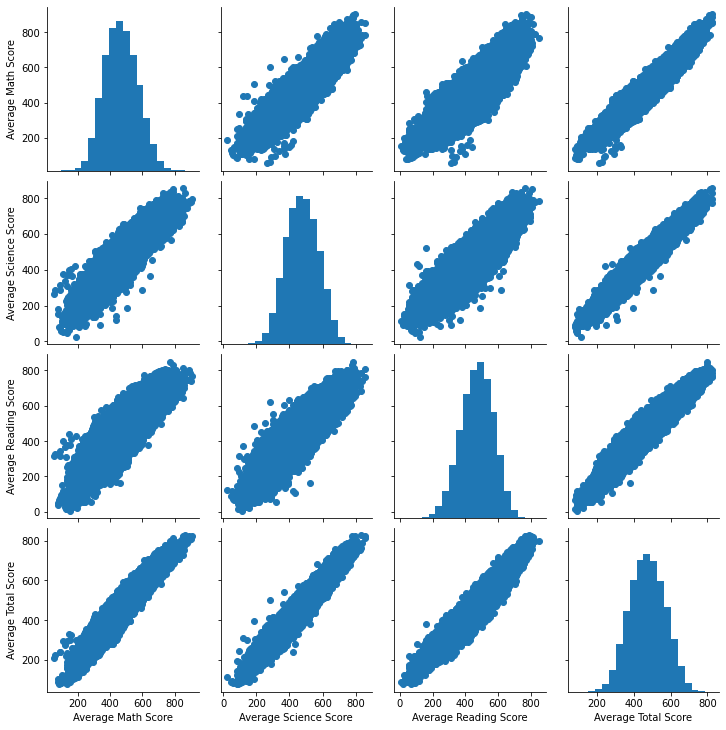

In [34]:
g = sb.PairGrid(data = data, vars = scores)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Here it can be seen how the scores are all related between them. The strongest correlation is between the average score in science and maths. The class size clearly shows that it has no correlation.

### Gender 

Let's check the relationship between gender and the different scores

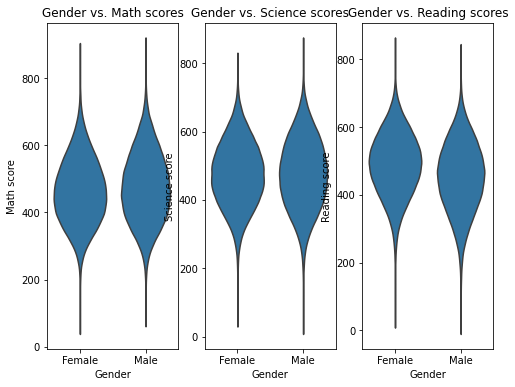

In [35]:
#Violin plot: gender vs. math scores
plt.figure(figsize = [8,6])

plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = gender, y = math, color = base_color,
              inner = None);
plt.title('Gender vs. Math scores');
plt.xlabel('Gender');
plt.ylabel('Math score');

#Violin plot: gender vs. math scores
plt.subplot(1,3,2)
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = gender, y = science, color = base_color,
              inner = None);
plt.title('Gender vs. Science scores');
plt.xlabel('Gender');
plt.ylabel('Science score');

#Violin plot: gender vs. reading scores
plt.subplot(1,3,3)
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = gender, y = reading, color = base_color,
              inner = None);
plt.title('Gender vs. Reading scores');
plt.xlabel('Gender');
plt.ylabel('Reading score');

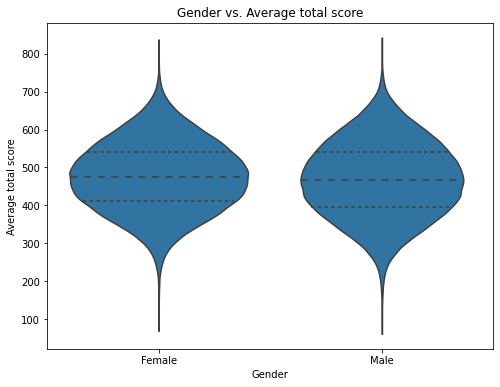

In [36]:
#total average
plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = gender, y = total, color = base_color,
              inner='quartile');
plt.title('Gender vs. Average total score');
plt.xlabel('Gender');
plt.ylabel('Average total score');

The 3 first graphs show how males get better grades in Science and Maths whereas women overpass them in Reading. However, in average, males and females get similar scores.

### Countries

We'll now check how countries affect their score.

In [37]:
data[country].describe()

count     485490
unique        68
top       Mexico
freq       33806
Name: Country, dtype: object

In [38]:
ave_cnt = data.groupby('Country')['Average Total Score'].mean()
ave_cnt.sort_values()

Country
Peru               375.251032
Qatar              382.426012
Indonesia          385.160529
Brazil             392.827357
Jordan             394.683219
                      ...    
Japan              540.020395
Korea              542.463084
Singapore          551.037344
Hong Kong-China    553.520097
China-Shanghai     586.541569
Name: Average Total Score, Length: 68, dtype: float64

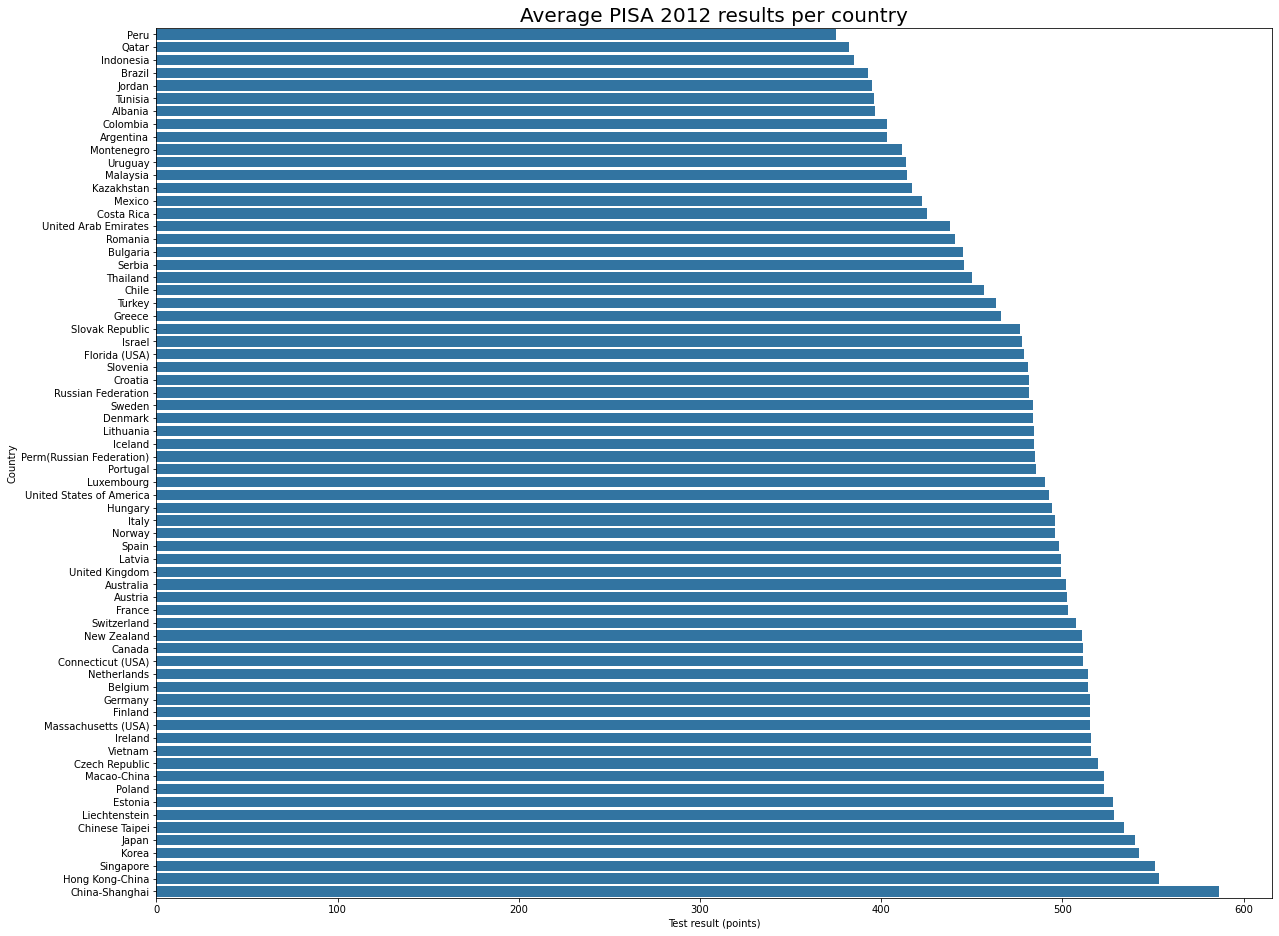

In [39]:
#Average PISA results per country
plt.figure(figsize = [20,16])
base_color = sb.color_palette()[0]
in_order = ave_cnt.sort_values().index
sb.barplot(ave_cnt.sort_values().values, in_order, color = base_color)
plt.xlabel('Test result (points)');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country', size=20);

Here you can clearly see how the best countries are China, Singapore, Korea and Japan. The countries that underperfom are Peru, Qatar, Indonesia and Brazil.

### Homework

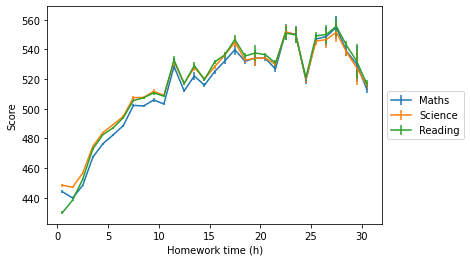

In [40]:
#Influence of time spent studying out of school to scores
bin_size = 1
xbin_edges = np.arange(0, data[math].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# MATH
# compute statistics in each bin
data_xbins = pd.cut(data[homework], xbin_edges, right = False, include_lowest = True)
y_means = data[math].groupby(data_xbins).mean()
y_sems = data[math].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

#SCIENCE
#compute statistics in each bin
data_xbins = pd.cut(data[homework], xbin_edges, right = False, include_lowest = True)
y_means = data[science].groupby(data_xbins).mean()
y_sems = data[science].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

#READING
#compute statistics in each bin
data_xbins = pd.cut(data[homework], xbin_edges, right = False, include_lowest = True)
y_means = data[reading].groupby(data_xbins).mean()
y_sems = data[reading].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('Homework time (h)')
plt.ylabel('Score')

plt.legend(['Maths', 'Science', 'Reading'], bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

Time spent studying out of school is important but only to a point. 

> Students benefit from more work outside the classroom. However, the benefits show a plateau effect as the time spent studying increases. This pattern is conssitent accross Math, Reading and Science scores.

### Class size

In [41]:
data[class_size].describe()

count    294163.000000
mean         26.017759
std           9.223134
min           0.000000
25%          20.000000
50%          25.000000
75%          30.000000
max         200.000000
Name: Class_size, dtype: float64

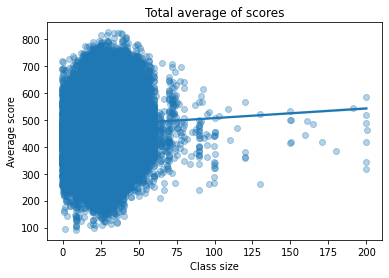

In [42]:
#Scatterplot with num_car class_size and scores

sb.regplot(data=data, x=class_size, y=total, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha':1/3})

plt.title('Total average of scores')
plt.ylabel('Average score')
plt.xlabel('Class size')
plt.show()

Although this graph isn't clear enough, its first ideas are: 

> Average scores seem to outperform around a 45 students class size but it may also be because on average, there are more schools with this number of students.

> It does show how class sizes that are bigger than 75 don't seem to outperform. However, we don't have enough data of class sizes bigger that 75 to make any assumptions. 

Let's just focus in class sizes between 20 and 75 and research more into this.


In [43]:
class_size = 'Class_size'

In [44]:
data2 = data.query('20 < Class_size < 75')

Text(0.5, 0, 'Class size')

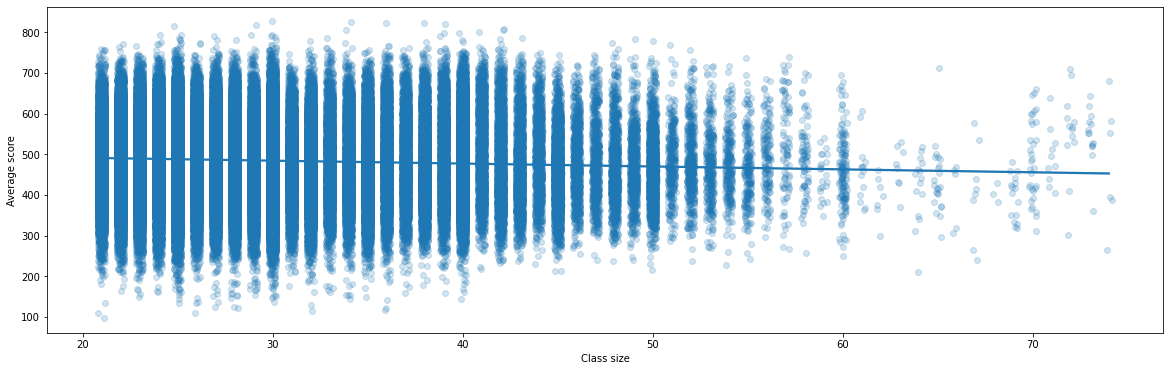

In [45]:
plt.figure(figsize = [20, 6])
sb.regplot(data=data2, x=class_size, y=total, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha':1/5})
plt.ylabel('Average score')
plt.xlabel('Class size')

Looking at this graph, class size does not influence on the results scores. 

### Parents education - bachelor

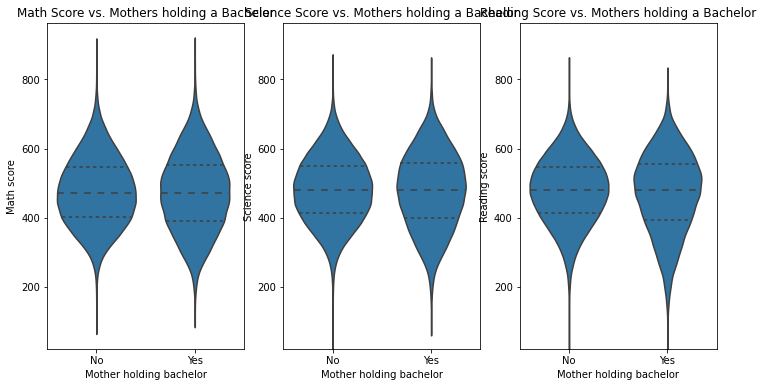

In [46]:
#nothers holding a bachelor VS scores
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = data, x = motherbachelor, y = math, color = base_color, inner='quartile')
plt.title('Math Score vs. Mothers holding a Bachelor');
plt.xlabel('Mother holding bachelor');
plt.ylabel('Math score');

#center plt: wiolin plot
plt.subplot(1, 3, 2)
sb.violinplot(data = data, x = motherbachelor, y = science, color=base_color, inner='quartile')
plt.ylim(ax1.get_ylim())
plt.title('Science Score vs. Mothers holding a Bachelor');
plt.xlabel('Mother holding bachelor');
plt.ylabel('Science score');

# right plot
plt.subplot(1, 3, 3)
sb.violinplot(data = data, x = motherbachelor, y = reading, color=base_color, inner='quartile')
plt.ylim(ax1.get_ylim())
plt.title('Reading Score vs. Mothers holding a Bachelor');
plt.xlabel('Mother holding bachelor');
plt.ylabel('Reading score');


Mothers holding a bachelor don't influence the resulting scores. 

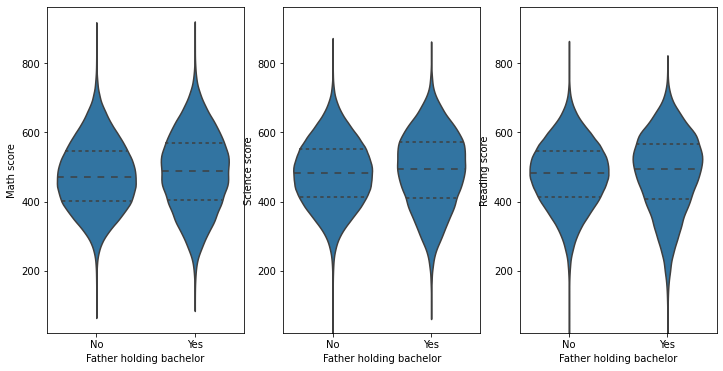

In [47]:
#Fathers holding a bachelor vs. scores
plt.figure(figsize = [12, 6])
base_color = sb.color_palette()[0]
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = data, x = fatherbachelor, y = math, color = base_color, inner='quartile')
plt.xlabel('Father holding bachelor');
plt.ylabel('Math score');

#center plt: wiolin plot
plt.subplot(1, 3, 2)
sb.violinplot(data = data, x = fatherbachelor, y = science, color=base_color, inner='quartile')
plt.ylim(ax1.get_ylim())
plt.xlabel('Father holding bachelor');
plt.ylabel('Science score');

# right plot
plt.subplot(1, 3, 3)
sb.violinplot(data = data, x = fatherbachelor, y = reading, color=base_color, inner='quartile')
plt.ylim(ax1.get_ylim())
plt.xlabel('Father holding bachelor');
plt.ylabel('Reading score');

Fathers holding a bachelor, slightly influence their kids result, but not by almost nothing. It almost does not influence it. 

## Parents education - highest schooling

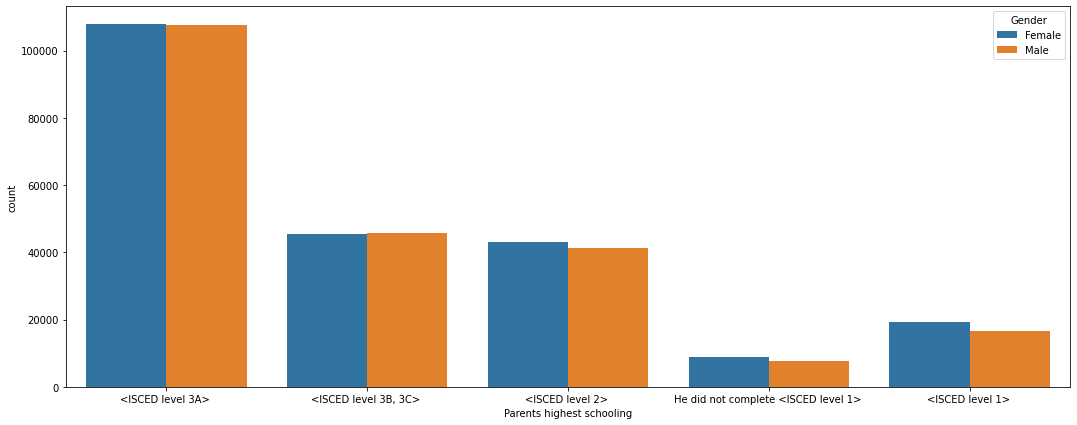

In [48]:
plt.figure(figsize=[18,7])
sb.countplot(data = data, x = father_hs, hue = gender);
plt.xlabel('Parents highest schooling');

The figures are similar for both mothers and fathers, males are slightly lower. There are less men who finish school.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It can be seen how the scores are all related between them, and getting better grades at math is related to getting grades at science an reading. Surprisingly, there's even a higher correlation between people that get good marks at reading and maths.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Males get better grades in Science and Maths whereas women overpass them in Reading. However, in average, males and females get similar scores.

> Regarding the countries and its scores average, you can clearly see how the top performing countries are China, Singapore, Korea and Japan. The countries that underperfom hte most are Peru, Qatar, Indonesia and Brazil. China almost arrives to the 600 maximum score, whereas Peru is around the 380 score.

> Time spent studying out of school is important but only to a point. Students benefit from more work outside the classroom. However, the benefits show a plateau effect as the time spent studying increases. This pattern is conssitent accross Math, Reading and Science scores.

> There is no correlation between their parents holding or not a bachelor and their resulting scores. The figures are similar for both mothers and fathers whit a bit less men who finish school.

> Also, there is the class size does not influence on their scores.

## Multivariate Exploration
<a id='multi_exp'></a>

### Average score, country, gender

In [49]:
ave_cnt = data.groupby('Country')['Average Total Score'].mean()
ave_cnt.sort_values()

Country
Peru               375.251032
Qatar              382.426012
Indonesia          385.160529
Brazil             392.827357
Jordan             394.683219
                      ...    
Japan              540.020395
Korea              542.463084
Singapore          551.037344
Hong Kong-China    553.520097
China-Shanghai     586.541569
Name: Average Total Score, Length: 68, dtype: float64

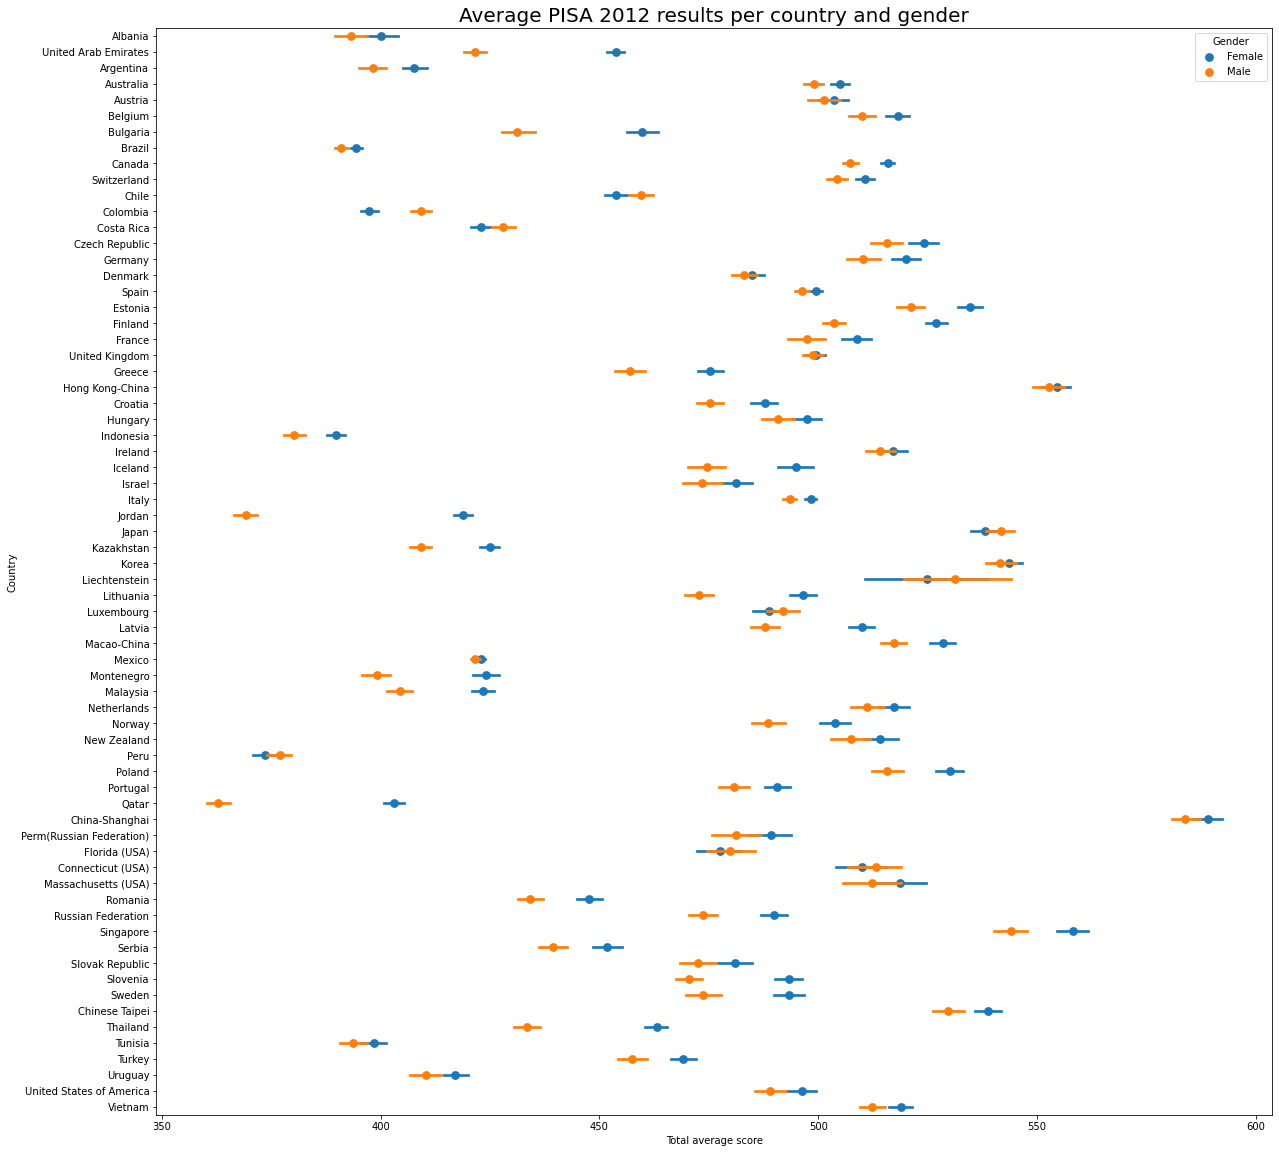

In [50]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = data, y = country, x = total, hue = gender, linestyles = "")
plt.xlabel('Total average score');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country and gender', size = 20);

Although, women and men get a very similar average total score, in most countries women tend to get slightly better score. The small country of Liechtenstein has the higher difference, and men outsand women with hige difference.

From the top countries, it's half/half.
- China: women (though nearly the same as men in Hong Kong, in Shangai women get more scores with difference)
- Singapore: women
- Korea: men (though almost the same as women)
- Japan: men

From the bottom countries, women tend to do better.
- Peru: men (although very close)
- Qatar: women by a huge difference 
- Indonesia: women
- Brazil: women, but very very close to men

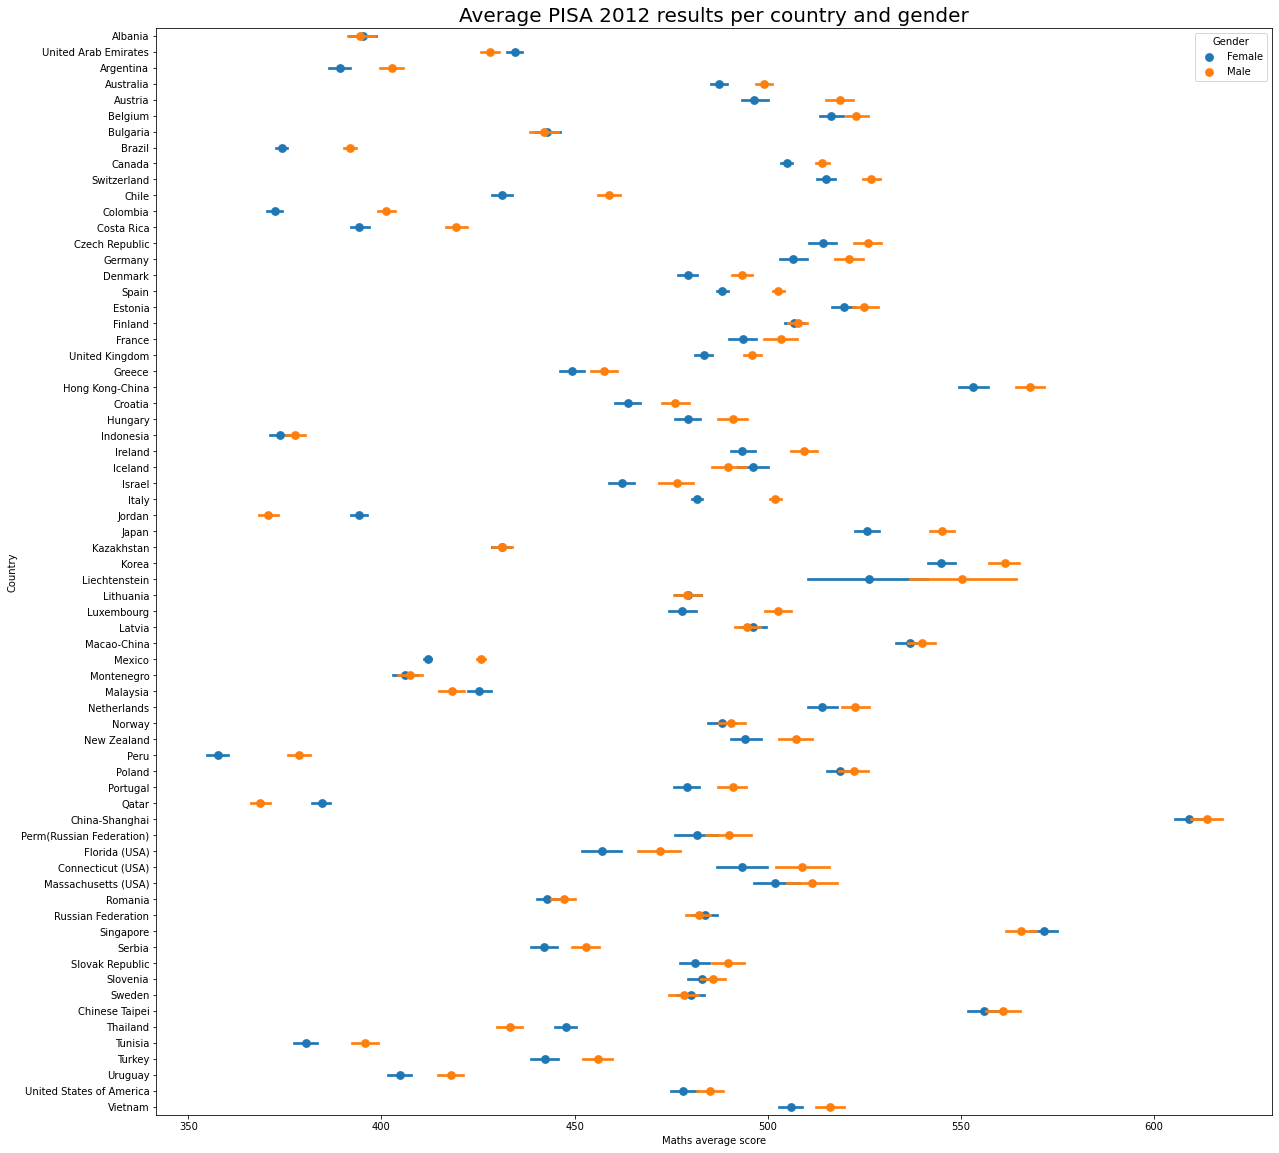

In [51]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = data, y = country, x = math, hue = gender, linestyles = "")
plt.xlabel('Maths average score');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country and gender', size = 20);

We already discovered that men got better grades at maths and science. Let's now check in relation to the best/worst performing countries.

From the top 4 countries, 3/4 male but gender gap is lower than in low performing countries.
- China: male, although very similar to women. It has a really slow gender gap.
- Singapore: female, but also with a very small gender gap. 
- Korea: male
- Japan: male

From the bottom 4 countries, 3/4 male.
- Peru: male 
- Qatar: female
- Indonesia: male, with very low gender gap
- Brazil: male

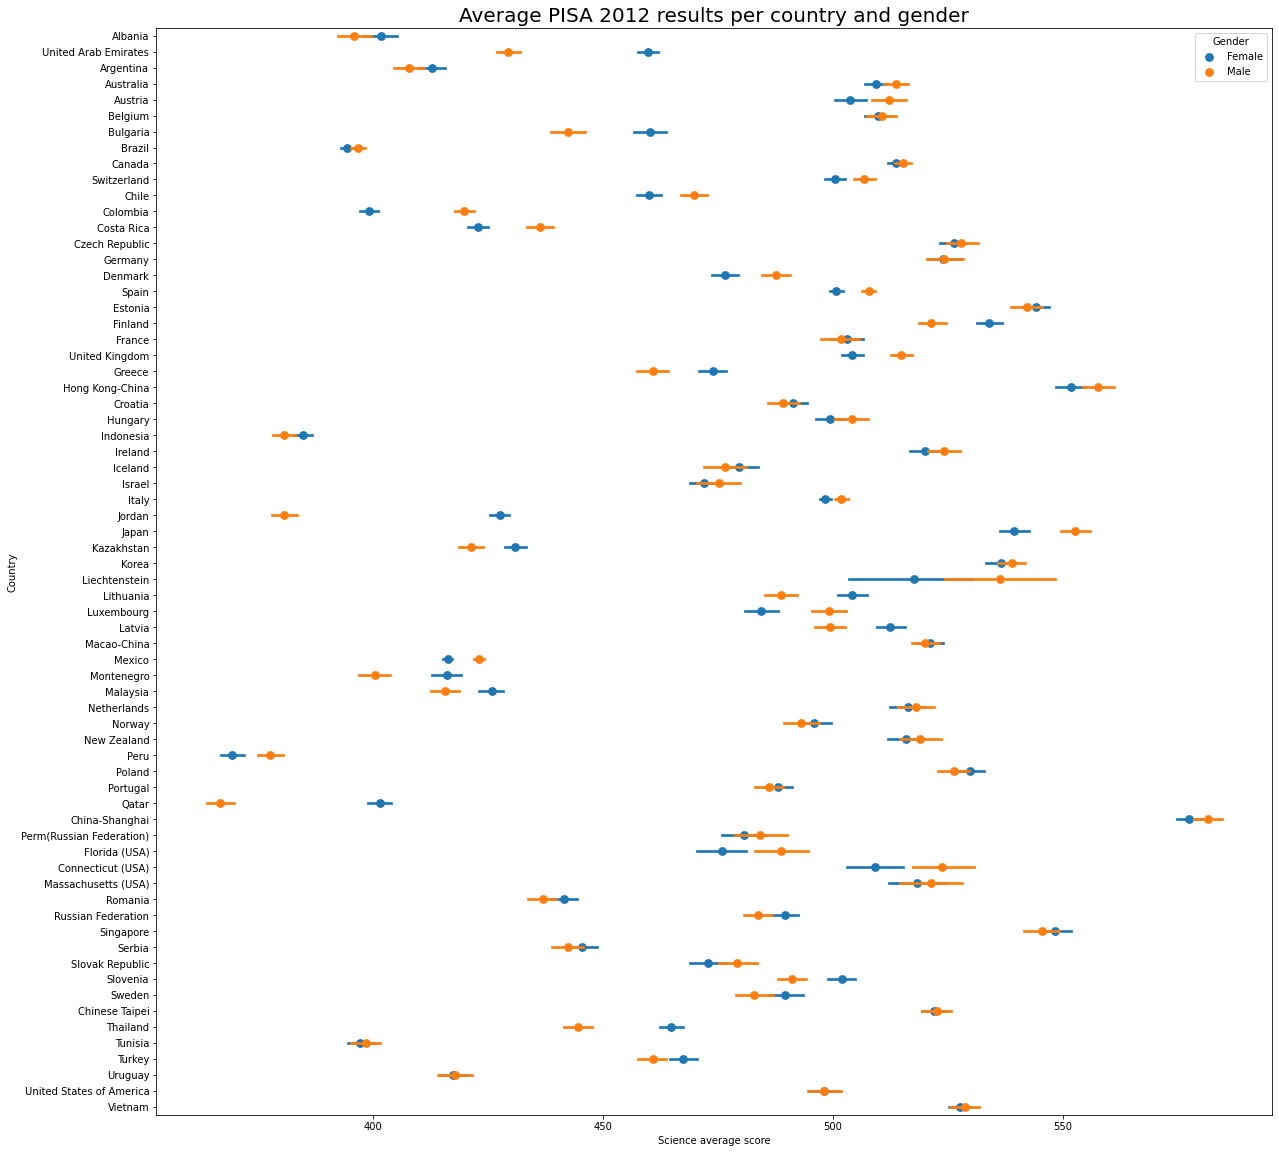

In [52]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = data, y = country, x = science, hue = gender, linestyles = "")
plt.xlabel('Science average score');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country and gender', size = 20);

We had already discovered that men got better grades at maths and science. Let's now check in relation to the best/worst performing countries.

From the top 4 countries, 3/4 male but gender gap is lower than in low performing countries.
- China: male, although very similar to women. It has a really slow gender gap.
- Singapore: female, but also with a very small gender gap. 
- Korea: male, with a very low gender gap
- Japan: male

From the bottom 4 countries, 3/4 male.
- Peru: male 
- Qatar: female, by a huge difference
- Indonesia: male, with very low gender gap
- Brazil: male, with very low gender gap

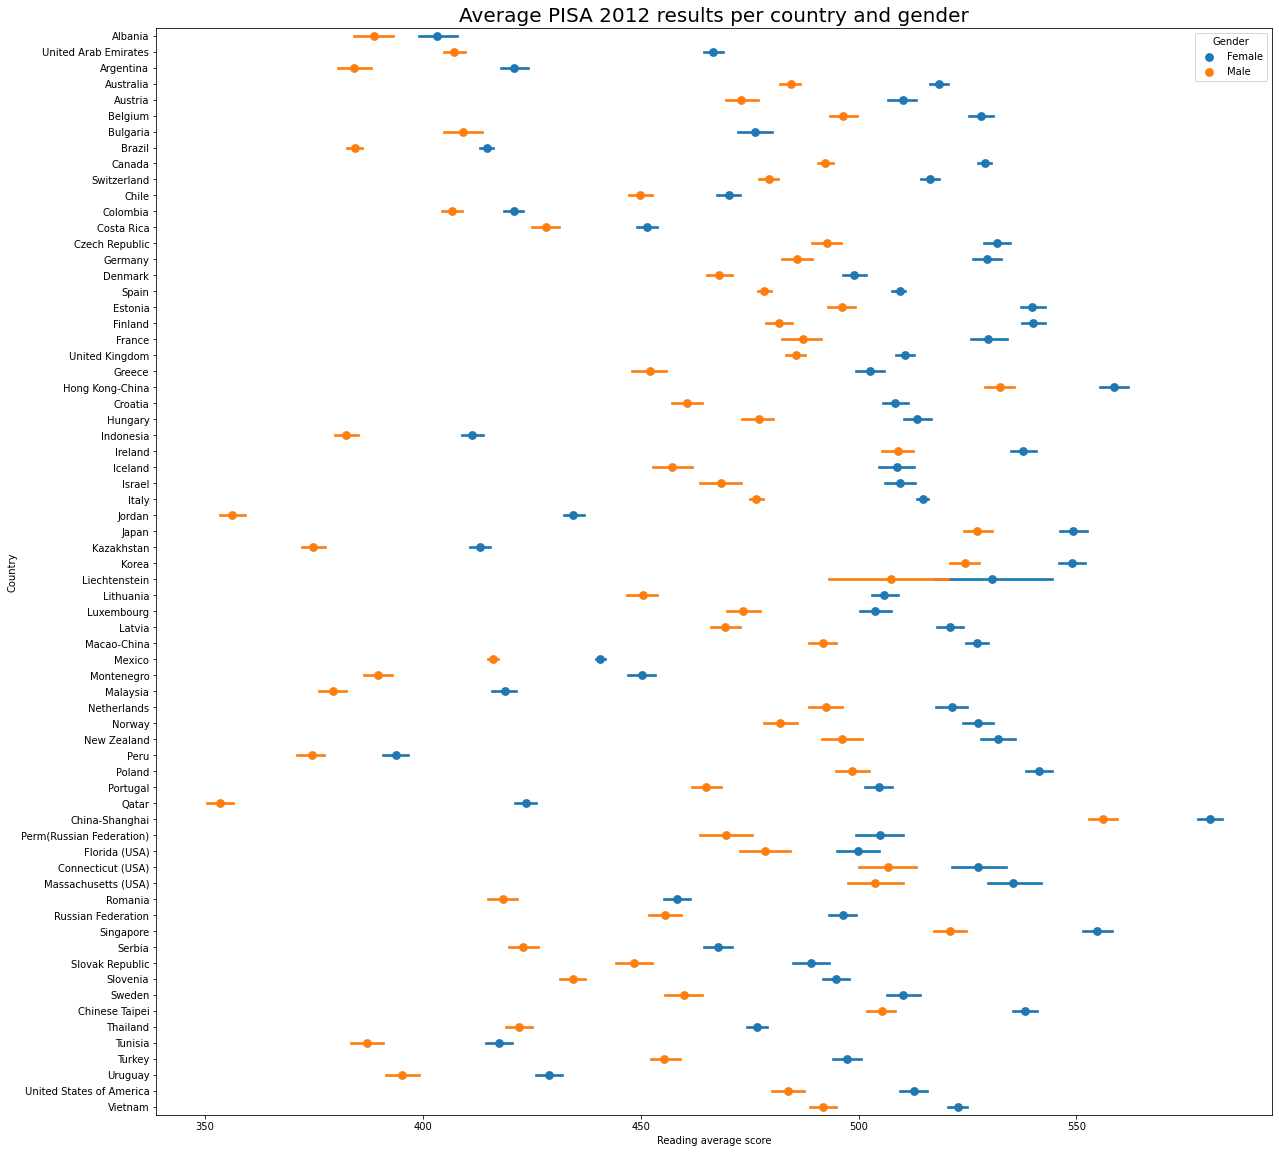

In [53]:
plt.figure(figsize = [20, 20])
ax = sb.pointplot(data = data, y = country, x = reading, hue = gender, linestyles = "")
plt.xlabel('Reading average score');
plt.ylabel('Country');
plt.title('Average PISA 2012 results per country and gender', size = 20);

We had already discovered that women got better grades at reading than men. Let's now check in relation to the best/worst performing countries.

From the top 4 countries, all female with a big gender gap and althought big, it isn't as big as the in the bottom countries.
- China: female, very big gender gap.
- Singapore: female, very big gender gap. 
- Korea: female, quite big gender gap
- Japan: female

From the bottom 4 countries, 3/4 male.
- Peru: female 
- Qatar: female, by a very impresive huge difference
- Indonesia: female, big gender gap
- Brazil: female, big gender gap

### Total Average Score, parents education, homework

Text(0.5, 0, 'Parents highest schooling')

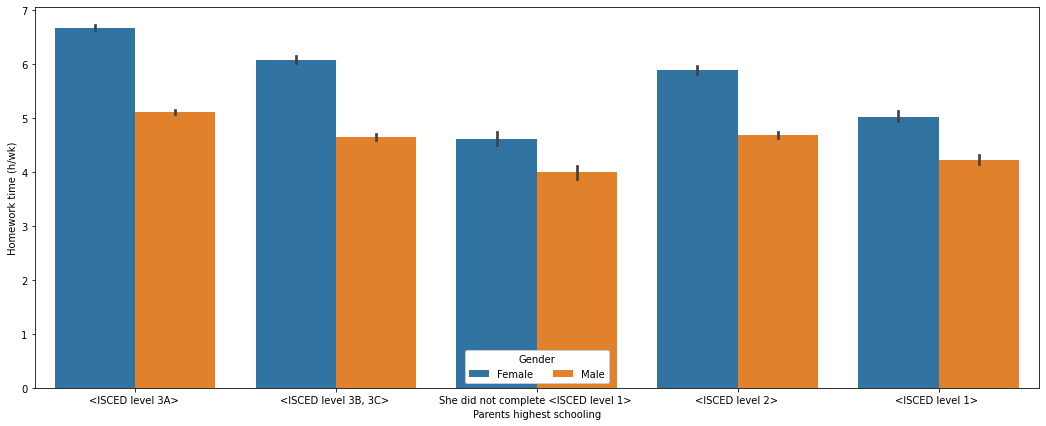

In [54]:
plt.figure(figsize=[18,7])
ax = sb.barplot(data = data, x = mother_hs, y = homework, hue = gender)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = gender)
plt.xlabel('Parents highest schooling')

ISCED Level 3 corresponds to finishing Upper secondary. 
Surprisingly, females get a huge influence in the fact that their children study more at home or not. The further they arrived when schooling, the more time their kids atudy at home.

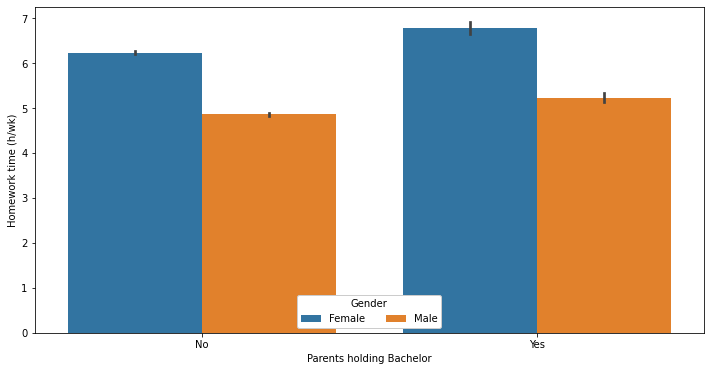

In [55]:
plt.figure(figsize=[12,6])
ax = sb.barplot(data = data, x = fatherbachelor, y = homework, hue = gender);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = gender);
plt.xlabel('Parents holding Bachelor');

Also, the fact of having or not a bachelor does influence whether they do more or less homework. Again, women influence ay more the fact that their children study more at home. 

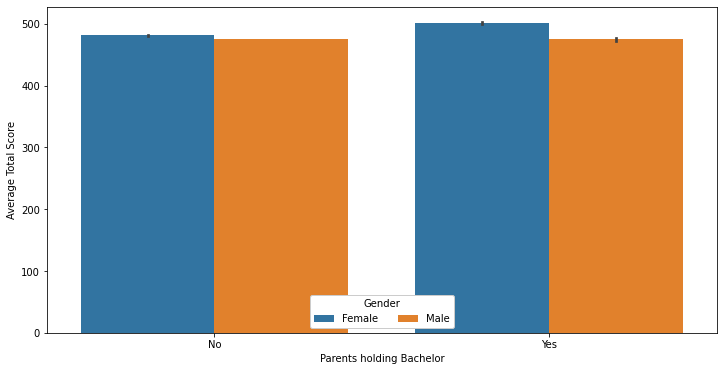

In [56]:
plt.figure(figsize=[12,6])
ax = sb.barplot(data = data, x = fatherbachelor, y = total, hue = gender);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = gender);
plt.xlabel('Parents holding Bachelor');

Moreover, as we mentioned before, the fact of having or not a bachelor does not influence a lot their final scores. It does influence a bit on women, if they have a bachelor, their kids do get a slighky better score.

### Class size, parents education, total average score

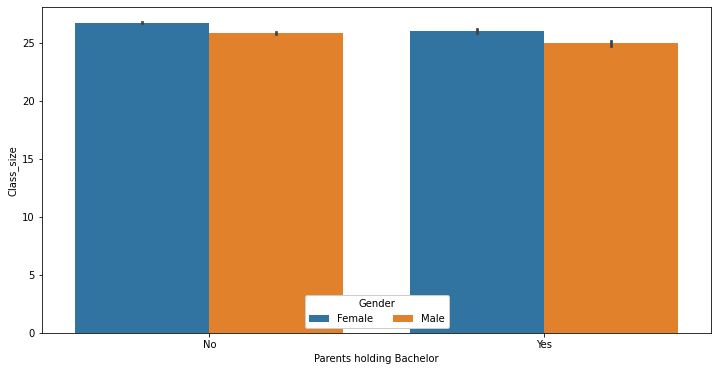

In [57]:
plt.figure(figsize=[12,6])
ax = sb.barplot(data = data, x = motherbachelor, y = class_size, hue = gender);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = gender);
plt.xlabel('Parents holding Bachelor');

Having or not a bachelor does not influence the kind of class sizes of your children. Average seems to be arround 26.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For this section, we investigated how gender, countries, parents education, homework time and class size influenced in the scores. We deep dived in the how the gender and countries variables interacted with the different scores. We also took a deeper look into how parent's education, homework time and gender influence the final average score.


### Were there any interesting or surprising interactions between features?

> Women and men get a very similar average total score. Women tend to get slightly better scores in most countries. The small country of Liechtenstein has the higher gender gap in maths&science, and men outsand women with huge difference. From the top countries, it's half/half. From the bottom countries, women tend to do better.

>> MATHS AND SCIENCE SCORE: We had already discovered in the bivariate exploration that men got better grades at maths and science. Still, taking into account the the top 4 countries, 3 out of 4 countries have male overpassing females BUT with a low gender gap. The gender gap is lower than in low performing countries.

>> READING SCORE: the gender gap (in favour of women) in reading is quite striking compared to the ones in maths and science, where men go in favour. This gender gap is even more remarkable in bottom countries. That may explain the fact that the total average score is very similar.

>  The parent's education and gender influence a lot in the time students spend working from home. Females get a huge influence in the fact that their children study more at home or not. The further they arrived when schooling, the more time their kids study at home. Also, the fact of having or not a bachelor does influence whether they do more or less homework. Moreover, as we mentioned before, the fact of having or not a bachelor does not influence a lot their final scores. It does influence a bit on women, if they have a bachelor, that their kids do get a slighky better score.
